In [42]:
%matplotlib inline
from pylab import *

In [43]:
import plasticnet as pn

Sim Time Elapsed...3.18 s


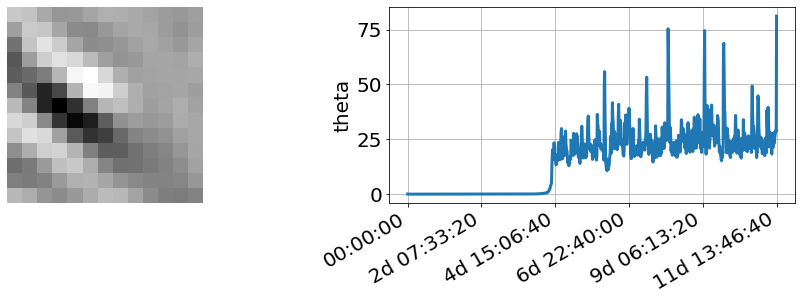

In [122]:
pre=pn.neurons.natural_images('asdf/bbsk081604_all_log2dog.asdf',rf_size=13,verbose=False)
post=pn.neurons.linear_neuron(1)
post+=pn.neurons.process.min_max(0,500)

c=pn.connections.BCM(pre,post,[-.01,.01])
c.eta=2e-6
c.tau=1000

sim=pn.simulation(1000*1000)
sim.monitor(c,['weights','theta'],1000)

pn.run_sim(sim,[pre,post],[c],display_hash=False)

pn.utils.plot_rfs_and_theta(sim,[pre,post],[c]);

In [60]:
c.weights.shape

(1, 169)

(0.0, 13.0, 0.0, 13.0)

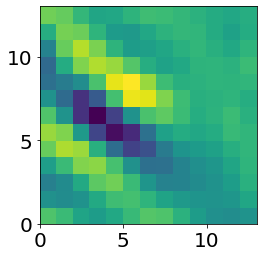

In [124]:
W=c.weights.reshape(13,13)
grid(False)
pcolor(W)
axis('square')

In [62]:
Wfft = np.fft.fftshift(abs(np.fft.fft2(W)));

In [63]:
Wfft.shape

(13, 13)

In [64]:
maxy,maxx=W.shape
center=(maxx/2)+1

In [65]:
argmax(W)

84

In [66]:
row,col=np.unravel_index(W.argmax(),W.shape)

In [67]:
deltay = center-row;
deltax = col-center;
rangle = np.arctan2(deltay,deltax)+pi/2;
dangle = (360/(2*pi))*rangle;

In [68]:
dangle %360

225.0

In [112]:
def myfft2(im,x=None,y=None):
    from numpy.fft import fft2,fftshift,fftfreq
    
    ny,nx=im.shape
    
    if x is None:
        dx=1
    elif len(x.shape)==2:
        dx=x[0,1]-x[0,0]
    elif len(x.shape)==1:
        dx=x[1]-x[0]
    else:
        raise NotImplementedError
        
    if y is None:
        dy=1
    elif len(y.shape)==2:
        dy=y[1,0]-y[0,0]
    elif len(y.shape)==1:
        dy=y[1]-y[0]
    else:
        raise NotImplementedError
        
    
    
    imf=fftshift(fft2(im))
    kx = fftshift(fftfreq(nx,dx))
    ky = fftshift(fftfreq(ny,dy))
    
    return kx,ky,imf
    

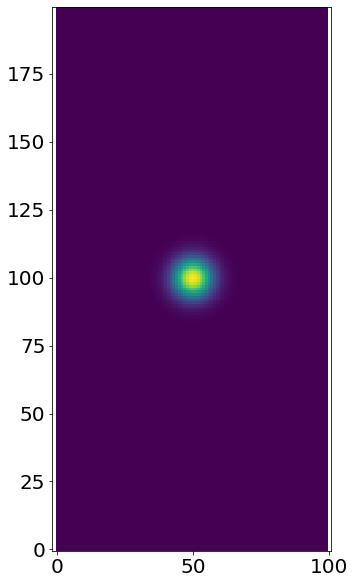

In [113]:
x,y=meshgrid(arange(100),arange(200))
σ=5
im=exp(-(x-50)**2/2/σ**2-(y-100)**2/2/σ**2)
figure(figsize=(5,10))
axis('equal')
grid(False)
pcolor(x,y,im)

In [114]:
x[0,0]

0

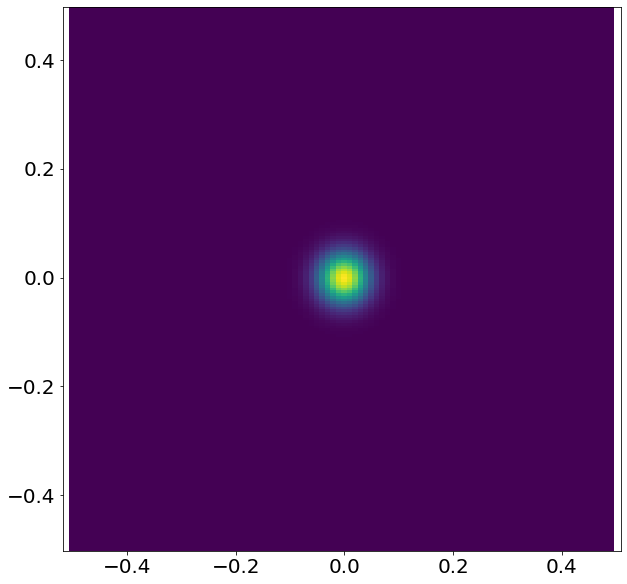

In [115]:
kx,ky,imf=myfft2(im)
imf=abs(imf)
figure(figsize=(10,10))
grid(False)
axis('equal')
pcolor(kx,ky,imf)

(0.0, 13.0, 0.0, 13.0)

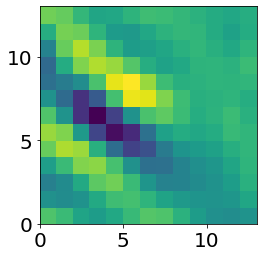

In [125]:
im=W

grid(False)
pcolor(W)
axis('square')

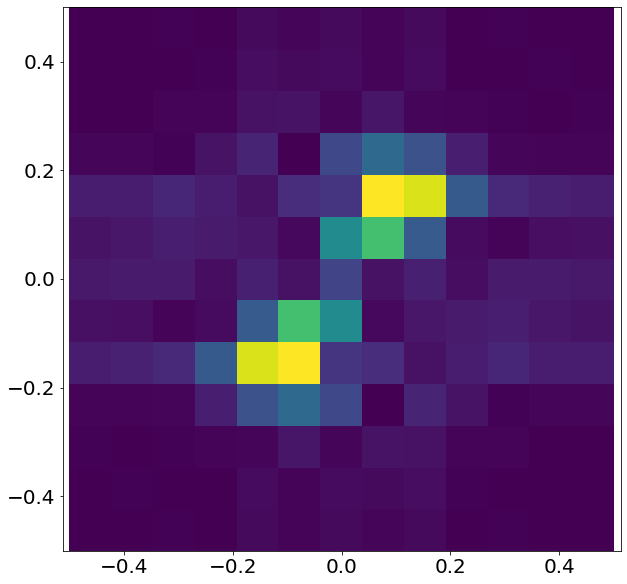

In [126]:
kx,ky,imf=myfft2(im)
imf=abs(imf)
figure(figsize=(10,10))
grid(False)
axis('equal')
pcolor(kx,ky,imf)

In [132]:
row,col=np.unravel_index(imf.argmax(),imf.shape)
rangle = np.degrees(np.arctan2(ky[row],kx[col])-pi/2)%360
rangle


153.434948822922

In [120]:
ky

array([-0.46153846, -0.38461538, -0.30769231, -0.23076923, -0.15384615,
       -0.07692308,  0.        ,  0.07692308,  0.15384615,  0.23076923,
        0.30769231,  0.38461538,  0.46153846])

(0.0, 59.0, 0.0, 59.0)

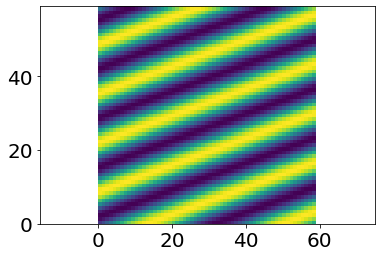

In [235]:
rf_diameter=59
θ=20 # degrees

rot=radians(-θ)

y,x= mgrid[-rf_diameter//2:rf_diameter//2,
                -rf_diameter//2:rf_diameter//2]
x=x+1
y=y+1


i,j= mgrid[-rf_diameter//2:rf_diameter//2,
                -rf_diameter//2:rf_diameter//2]
i=i+1
j=j+1

k=0.5

kx=k*cos(rot)
ky=k*sin(rot)


im=sin(kx*i+ky*j)
grid(False)
pcolor(im)
axis('equal')

25 31


26.565051177078004

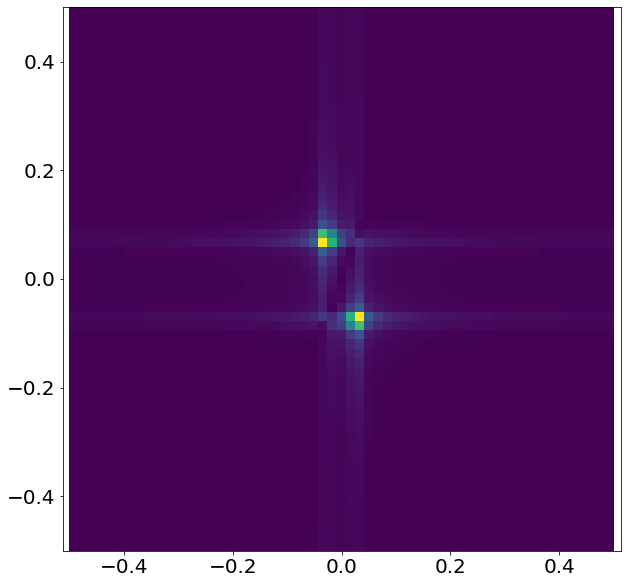

In [228]:
kx,ky,imf=myfft2(im,x,y)
imf=abs(imf)
figure(figsize=(10,10))
grid(False)
axis('equal')
pcolor(kx,ky,imf)
row,col=np.unravel_index(imf.argmax(),imf.shape)
print(row,col)
rangle = np.degrees(np.arctan2(ky[row],kx[col])-pi/2)%180
rangle


/Users/bblais/tmp/ipykernel_74067/4139770545.py:16: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  pcolor(xx,yy,im2)


(-29.1, 29.89999999999979, -29.05, 29.950000000000838)

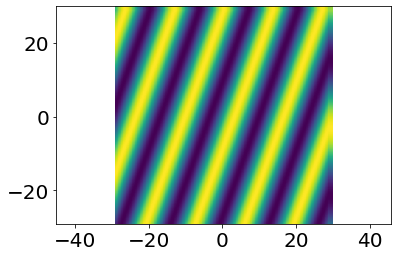

In [243]:
from scipy.interpolate import interp2d,RectBivariateSpline
x=arange(-rf_diameter//2,rf_diameter//2)
y=arange(-rf_diameter//2,rf_diameter//2)

x=x+1
y=y+1

f=RectBivariateSpline(x, y, im)

xx=arange(-rf_diameter//2,rf_diameter//2,.2)
yy=arange(-rf_diameter//2,rf_diameter//2,.1)
xx=xx+1
yy=yy+1

im2 = f(xx, yy).T
pcolor(xx,yy,im2)
axis('equal')

In [242]:
im2.shape

(295, 590)

In [240]:
x.shape

(295,)

((590, 590), (590, 590))

291 293


153.434948822922

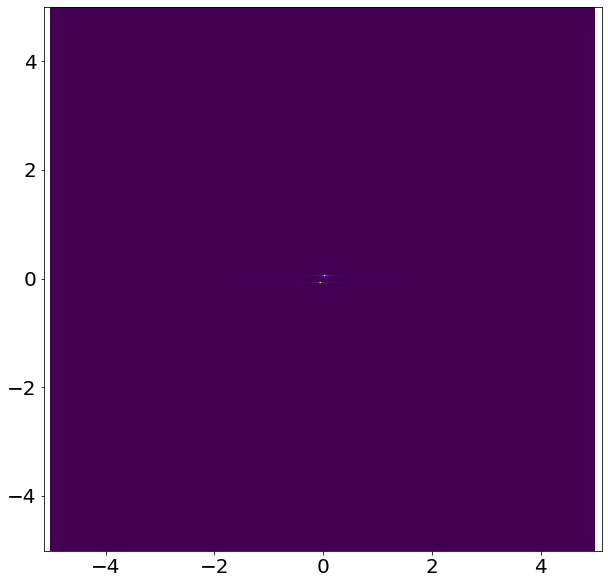

In [212]:
kx,ky,imf=myfft2(im2,xx,yy)
imf=abs(imf)
figure(figsize=(10,10))
grid(False)
axis('equal')
pcolor(kx,ky,imf)
row,col=np.unravel_index(imf.argmax(),imf.shape)
print(row,col)
rangle = np.degrees(np.arctan2(ky[row],kx[col])-pi/2)%180
rangle
